**Kroger Assessment - Space to Sales**

**Business Objective:**  
I’m want to help Kroger decide how to arrange produce across five new, 14×14-foot display tables to increase sales and minimize waste. By digging into the data on product sizes, sales performance, and popularity, I aim to make recommendations that not only maximize revenue but also reduce spoilage and inventory inefficiencies. Through this analysis, I’ll pinpoint which items bring the greatest benefit to Kroger’s customers and overall operations.


# Step 1 Intital Data Checks

## Importing Key Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [7]:
produce_table = pd.read_csv("produce_table.csv") 
produce_info = pd.read_csv("produce_info.csv")


## Produce Table

In [10]:
produce_table.head()

,Tbl No,Tbl Type,Run Lngth (ft),Base UPC,Pct Sales (%),Sales Score
0,1,Slanted,14,1111018195,7.20,4
1,1,Slanted,14,4134,16.12,5
2,1,Slanted,14,1111091188,36.29,5
3,1,Slanted,14,1111091189,28.10,5
4,1,Slanted,14,3283,29.48,5


In [12]:
produce_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tbl No          109 non-null    int64  
 1   Tbl Type        109 non-null    object 
 2   Run Lngth (ft)  109 non-null    int64  
 3   Base UPC        109 non-null    int64  
 4   Pct Sales (%)   109 non-null    float64
 5   Sales Score     109 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ KB


In [14]:
produce_table.describe()

,Tbl No,Run Lngth (ft),Base UPC,Pct Sales (%),Sales Score
count,109.000000,109.0,1.090000e+02,109.000000,109.000000
mean,2.596330,14.0,5.380622e+09,7.173486,3.165138
std,1.334161,0.0,1.841135e+10,10.455637,1.404449
min,1.000000,14.0,3.040000e+03,0.010000,1.000000
25%,1.000000,14.0,4.395000e+03,0.960000,2.000000
50%,2.000000,14.0,1.111000e+09,4.010000,3.000000
75%,4.000000,14.0,1.111091e+09,8.760000,4.000000
max,5.000000,14.0,8.175780e+10,81.220000,5.000000


In [16]:
print(produce_table.isna().sum())

Tbl No            0
Tbl Type          0
Run Lngth (ft)    0
Base UPC          0
Pct Sales (%)     0
Sales Score       0
dtype: int64


## Produce Info Table

In [20]:
produce_info.head()

,Base UPC,UPC Desc,FT Commodity,UPC Width (in)
0,93283,APPLES HNYCRSP 1/2CTN ORG,600 APPLES,3.5
1,4132,APPLES GALA SML,600 APPLES,3.0
2,4087,TOMATOES ROMA,617 TOMATOES,5.9
3,3338391098,POTATOES YUKON ORGNC,618 POTATOES,5.0
4,4015,APPLES RED DELICIOUS SML,600 APPLES,3.0


In [22]:
produce_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Base UPC        109 non-null    int64  
 1   UPC Desc        109 non-null    object 
 2   FT Commodity    109 non-null    object 
 3   UPC Width (in)  109 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [24]:
produce_info.describe()

,Base UPC,UPC Width (in)
count,1.090000e+02,109.000000
mean,5.380622e+09,4.936697
std,1.841135e+10,2.558326
min,3.040000e+03,1.500000
25%,4.395000e+03,3.000000
50%,1.111000e+09,4.100000
75%,1.111091e+09,6.000000
max,8.175780e+10,15.500000


In [26]:
print(produce_info.isna().sum())

Base UPC          0
UPC Desc          0
FT Commodity      0
UPC Width (in)    0
dtype: int64


In [28]:
print("Duplicates in produce table:", produce_table.duplicated().sum())
print("Duplicates in produce info table:", produce_info.duplicated().sum())


Duplicates in produce table: 0
Duplicates in produce info table: 0


### Observations and Initial Thoughts

- **Data Structure**  
  The data appears well-structured: we have columns for UPC codes, descriptions, and item sizes, plus additional information on sales percentages and scores. Row counts look manageable, and data types align with what we’d expect (e.g. integers for UPC, floats for widths).

- **Missing Values**  
  There are no missing or null values in either dataset, which simplifies our cleaning process.

- **Next Steps**  
  I’ll merge these two datasets on their shared UPC column and then move forward with a deeper Exploratory Data Analysis (EDA). This should help me compare item sizes against sales performance and identify any interesting trends or patterns.


# Step 2 Data Cleaning & Merging

## Check Columns

In [33]:
print("Columns in produce_table:", list(produce_table.columns))
print("Columns in produce_info:", list(produce_info.columns))

Columns in produce_table: ['Tbl No', 'Tbl Type', 'Run Lngth (ft)', 'Base UPC', 'Pct Sales (%)', 'Sales Score']
Columns in produce_info: ['Base UPC', 'UPC Desc', 'FT Commodity', 'UPC Width (in)']


## Merge the columns

In [36]:
df_merged = pd.merge(produce_table, produce_info, on='Base UPC', how='left')

In [38]:
df_merged.to_csv("produce_sales_info_merged.csv", index = False)

In [40]:
# Inspecting the merged DataFrame

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tbl No          109 non-null    int64  
 1   Tbl Type        109 non-null    object 
 2   Run Lngth (ft)  109 non-null    int64  
 3   Base UPC        109 non-null    int64  
 4   Pct Sales (%)   109 non-null    float64
 5   Sales Score     109 non-null    int64  
 6   UPC Desc        109 non-null    object 
 7   FT Commodity    109 non-null    object 
 8   UPC Width (in)  109 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.8+ KB


In [42]:
display(df_merged.head())

,Tbl No,Tbl Type,Run Lngth (ft),Base UPC,Pct Sales (%),Sales Score,UPC Desc,FT Commodity,UPC Width (in)
0,1,Slanted,14,1111018195,7.20,4,KRO GRAPEFRUIT RED BAG,602 CITRUS,13.00
1,1,Slanted,14,4134,16.12,5,APPLES GALA EURO 50 CT,600 APPLES,3.50
2,1,Slanted,14,1111091188,36.29,5,LEMONS BAG FANCY RPC (KR),602 CITRUS,6.00
3,1,Slanted,14,1111091189,28.10,5,KRO LIMES,602 CITRUS,13.25
4,1,Slanted,14,3283,29.48,5,APPLES HONEYCRISP EURO,600 APPLES,3.50


In [44]:
print(df_merged.isna().sum())

Tbl No            0
Tbl Type          0
Run Lngth (ft)    0
Base UPC          0
Pct Sales (%)     0
Sales Score       0
UPC Desc          0
FT Commodity      0
UPC Width (in)    0
dtype: int64


- **Observations**:
  1. **No Missing Data**
  2. **Appropriate Data Types**
  3. **Row Count**: With 109 total entries, the dataset is quite manageable for deeper analysis.


- **Next Steps**: 
  I’ll now move on to **Exploratory Data Analysis (EDA)**. This will include:
  - Examining the distribution of Sales Score, Pct Sales (%), and UPC Width (in).
  - Looking at relationships between item width, sales percentages, and sales scores.
  - Potentially grouping or summarizing the data by FT Commodity to see if there are patterns in how commodities perform.

# Step 3 Exploratory Data Analysis

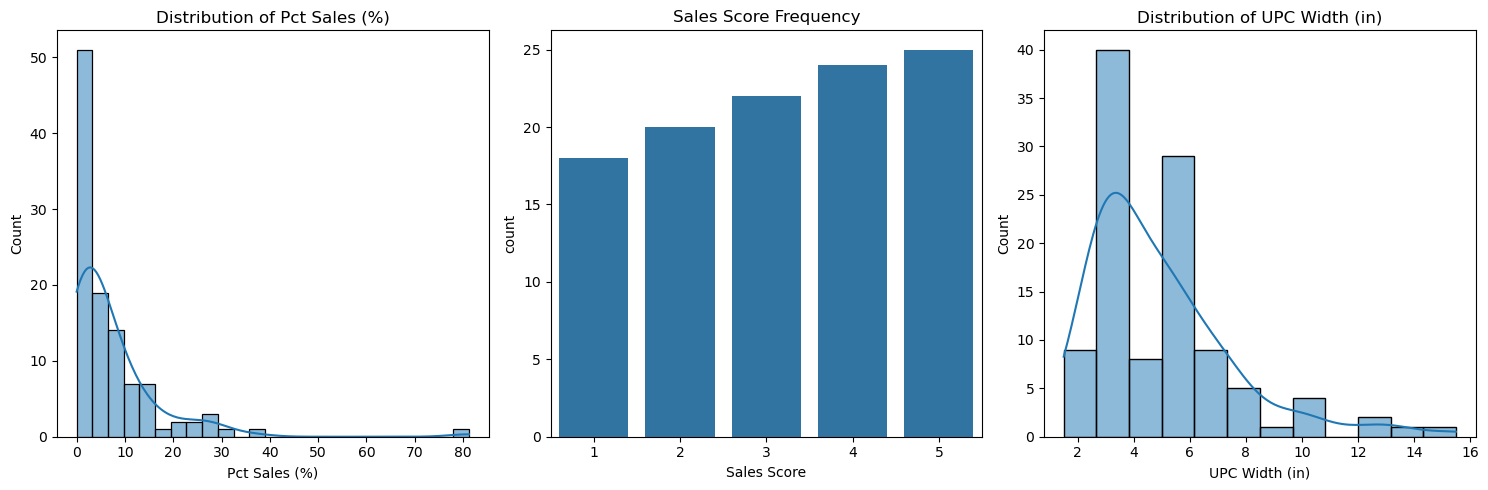

In [48]:
# Distribution of Key Numeric Columns

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of Pct Sales (%)
sns.histplot(data=df_merged, x='Pct Sales (%)', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Pct Sales (%)')

# Distribution of Sales Score
sns.countplot(data=df_merged, x='Sales Score', ax=axes[1])
axes[1].set_title('Sales Score Frequency')

# Distribution of UPC Width (in)
sns.histplot(data=df_merged, x='UPC Width (in)', kde=True, ax=axes[2])
axes[2].set_title('Distribution of UPC Width (in)')

plt.tight_layout()
plt.show()



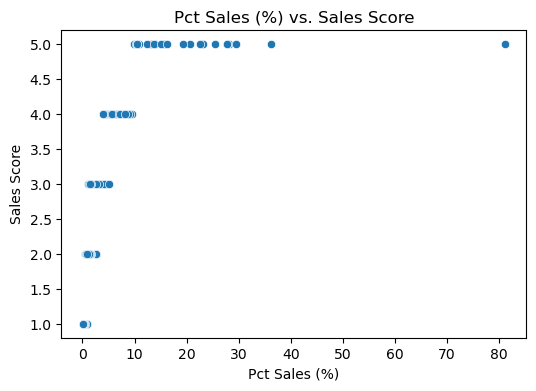

FT Commodity Pct Sales (%)              Sales Score  \
                                                mean    max   min        mean   
0   600 APPLES                              7.587917  29.48  0.30    3.750000   
1   601 PEARS                               1.543333   5.55  0.08    2.000000   
2   602 CITRUS                             13.295000  36.29  0.53    3.333333   
3   605 STONE FRUIT                         5.746667   8.07  4.07    3.666667   
4   606 TROPICAL FRUIT                      4.890000  20.65  0.06    2.700000   
5   614 HERBS/GARLIC                        1.665000   3.66  0.31    2.250000   
6                     614 HERBS/GARLIC      1.230000   1.50  0.96    1.500000   
7   617 TOMATOES                            6.465909  27.78  0.36    3.090909   
8   618 POTATOES                            5.639500  25.42  0.01    3.000000   
9   619 ONIONS                              9.195556  23.10  0.75    3.777778   
10  620 BANANAS                            32.570000  81.22  0.25    3.666667   

           UPC Width (in)              
   max min           mean    max  min  
0    5   1       4.135417   8.00  2.5  
1    4   1       4.083333  10.00  2.5  
2    5   1       8.541667  13.25  6.0  
3    4   3       4.000000   4.00  4.0  
4    5   1       3.600000   5.50  2.5  
5    3   1       3.750000   6.00  2.0  
6    2   1       3.000000   3.00  3.0  
7    5   1       4.863636   7.50  1.5  
8    5   1       6.900000  15.50  2.5  
9    5   2       3.555556   6.00  2.0  
10   5   1       5.700000   8.00  4.1

In [50]:
#Relationship Between Sales Score and Pct Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_merged, x='Pct Sales (%)', y='Sales Score')
plt.title('Pct Sales (%) vs. Sales Score')
plt.show()

# Group Analysis by Commodity
commodity_stats = df_merged.groupby('FT Commodity').agg({
    'Pct Sales (%)': ['mean', 'max', 'min'],
    'Sales Score': ['mean', 'max', 'min'],
    'UPC Width (in)': ['mean', 'max', 'min']
}).reset_index()

display(commodity_stats)




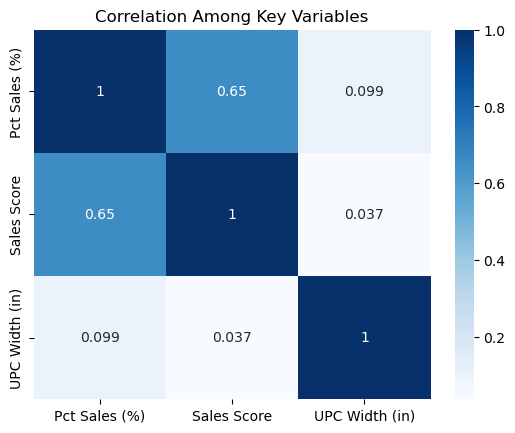

In [52]:
numerical_cols = ['Pct Sales (%)', 'Sales Score', 'UPC Width (in)']
corr = df_merged[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Among Key Variables")
plt.show()


In [54]:
# Summary by Table Type
table_stats = df_merged.groupby('Tbl Type').agg({
    'Pct Sales (%)': 'mean',
    'Sales Score': 'mean',
    'UPC Width (in)': 'mean'
}).reset_index()

display(table_stats)

,Tbl Type,Pct Sales (%),Sales Score,UPC Width (in)
0,Slanted,7.173486,3.165138,4.936697


In [56]:
commodity_stats = df_merged.groupby('FT Commodity').agg({
    'Pct Sales (%)': ['mean','max','min'],
    'Sales Score': ['mean','max','min'],
    'UPC Width (in)': ['mean','max','min']
}).reset_index()
display(commodity_stats)


FT Commodity Pct Sales (%)              Sales Score  \
                                                mean    max   min        mean   
0   600 APPLES                              7.587917  29.48  0.30    3.750000   
1   601 PEARS                               1.543333   5.55  0.08    2.000000   
2   602 CITRUS                             13.295000  36.29  0.53    3.333333   
3   605 STONE FRUIT                         5.746667   8.07  4.07    3.666667   
4   606 TROPICAL FRUIT                      4.890000  20.65  0.06    2.700000   
5   614 HERBS/GARLIC                        1.665000   3.66  0.31    2.250000   
6                     614 HERBS/GARLIC      1.230000   1.50  0.96    1.500000   
7   617 TOMATOES                            6.465909  27.78  0.36    3.090909   
8   618 POTATOES                            5.639500  25.42  0.01    3.000000   
9   619 ONIONS                              9.195556  23.10  0.75    3.777778   
10  620 BANANAS                            32.570000  81.22  0.25    3.666667   

           UPC Width (in)              
   max min           mean    max  min  
0    5   1       4.135417   8.00  2.5  
1    4   1       4.083333  10.00  2.5  
2    5   1       8.541667  13.25  6.0  
3    4   3       4.000000   4.00  4.0  
4    5   1       3.600000   5.50  2.5  
5    3   1       3.750000   6.00  2.0  
6    2   1       3.000000   3.00  3.0  
7    5   1       4.863636   7.50  1.5  
8    5   1       6.900000  15.50  2.5  
9    5   2       3.555556   6.00  2.0  
10   5   1       5.700000   8.00  4.1

## Avg % of Sales, sales score and width by Commodity 

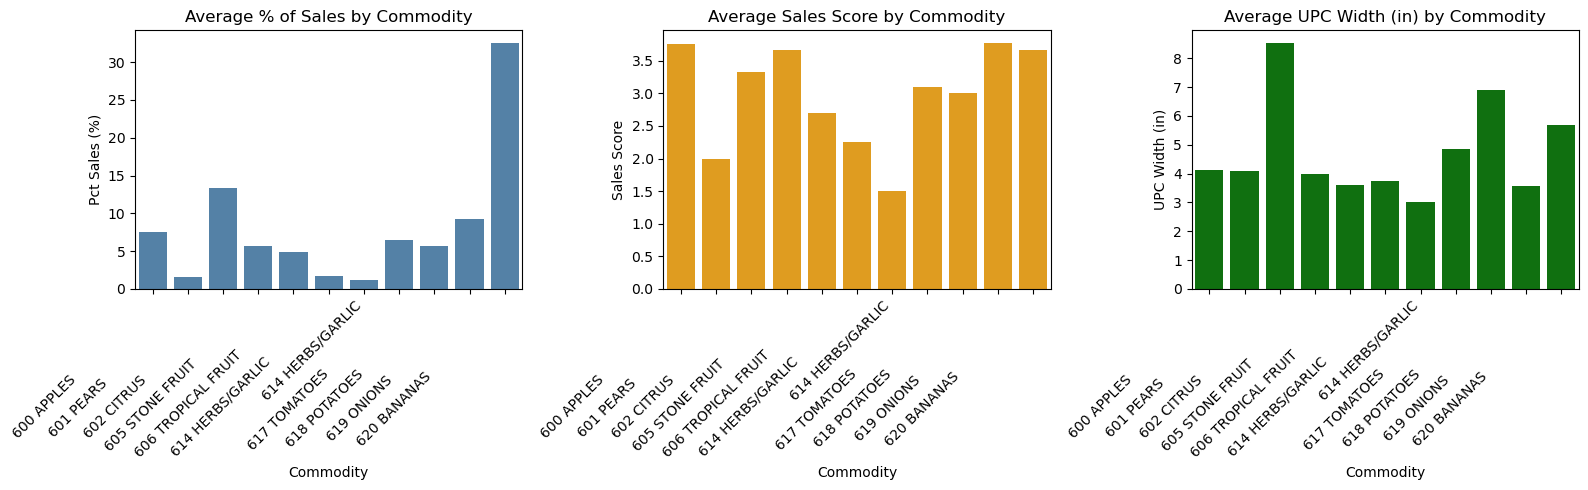

In [63]:
commodity_stats.columns = [
    "FT Commodity",
    "PctSales_mean", "PctSales_max", "PctSales_min",
    "SalesScore_mean", "SalesScore_max", "SalesScore_min",
    "UPCWidth_mean", "UPCWidth_max", "UPCWidth_min"
]

plt.figure(figsize=(16, 5))

# 1. Bar Chart for Average % Sales
plt.subplot(1, 3, 1)
sns.barplot(
    data=commodity_stats,
    x="FT Commodity",
    y="PctSales_mean",
    color="steelblue"
)
plt.title("Average % of Sales by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Pct Sales (%)")
plt.xticks(rotation=45, ha='right')

# 2. Bar Chart for Average Sales Score
plt.subplot(1, 3, 2)
sns.barplot(
    data=commodity_stats,
    x="FT Commodity",
    y="SalesScore_mean",
    color="orange"
)
plt.title("Average Sales Score by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Sales Score")
plt.xticks(rotation=45, ha='right')

# 3. Bar Chart for Average UPC Width
plt.subplot(1, 3, 3)
sns.barplot(
    data=commodity_stats,
    x="FT Commodity",
    y="UPCWidth_mean",
    color="green"
)
plt.title("Average UPC Width (in) by Commodity")
plt.xlabel("Commodity")
plt.ylabel("UPC Width (in)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Key Takeaways

- **High Sales Commodities**  
  Bananas, Citrus, Apples, and Onions show higher percentages of total sales, making them strong revenue drivers.
- **Lower Sales Scores**  
  Pears and Herbs/Garlic have lower average sales scores, indicating they may not be as popular with customers.
- **Larger Item Widths**  
  Citrus, Apples, Bananas, Potatoes, and Tomatoes range from about 4–8 inches, requiring more table space to accommodate.
- **Smaller Footprint**  
  Onions and Herbs/Garlic have smaller widths, allowing more flexibility in how they’re displayed.

**Overall**:  
While larger, high-selling items like Citrus, Bananas and Apples need ample table space, smaller items such as Onions or Herbs/Garlic can fit neatly around them, optimizing both variety and profit potential.


# Step 4 Allocation strategy

## Defining a Combined Ranking Metric

I'm creating a simple metric that merges each item's sales impact (% Sales, Sales Score) with its physical footprint (UPC Width). By boosting high-selling items and penalizing larger widths, this combined metric makes it straightforward to rank items and decide which deserve prime placement on the tables.


Top 5 Items


,Base UPC,UPC Desc,Pct Sales (%),Sales Score,UPC Width (in),combined_metric
101,4011,BANANAS,81.22,5,5.00,405.10
2,1111091188,LEMONS BAG FANCY RPC (KR),36.29,5,6.00,180.25
4,3283,APPLES HONEYCRISP EURO,29.48,5,3.50,146.70
37,1111091686,TOMATOES GRAPE SWEET,27.78,5,5.00,137.90
3,1111091189,KRO LIMES,28.10,5,13.25,137.85


Bottom 5 Items


,Base UPC,UPC Desc,Pct Sales (%),Sales Score,UPC Width (in),combined_metric
107,3127,POMEGRANATE,0.06,1,4.0,-0.74
11,1111090032,PRSL NAVEL HEIRLM BAG RPC,0.53,1,7.0,-0.87
83,4091,YAMS WHITE RPC,0.42,1,7.0,-0.98
106,4235,PLANTAINS CHIQUITA,0.25,1,8.0,-1.35
85,1111018219,KRO POTATOES SWEET TRAY,0.26,1,10.0,-1.74


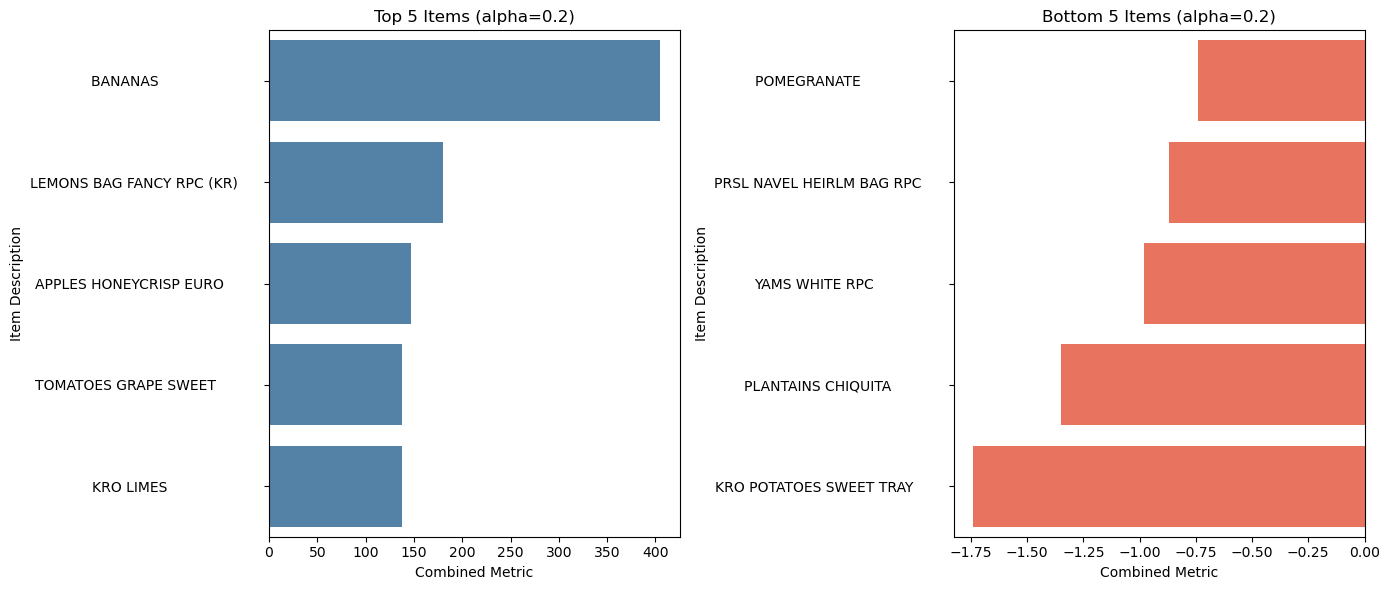

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate combined metric and sort descending
alpha = 0.2
df_merged['combined_metric'] = (
    (df_merged['Pct Sales (%)'] * df_merged['Sales Score']) 
    - (alpha * df_merged['UPC Width (in)'])
)
df_merged.sort_values(by='combined_metric', ascending=False, inplace=True)

# Extract top 5 and bottom 5
top_n = 5
df_top5 = df_merged.head(top_n)
df_bottom5 = df_merged.tail(top_n)

# Display data tables
print("Top 5 Items")
display(df_top5[['Base UPC', 'UPC Desc', 'Pct Sales (%)', 'Sales Score', 'UPC Width (in)', 'combined_metric']])

print("Bottom 5 Items")
display(df_bottom5[['Base UPC', 'UPC Desc', 'Pct Sales (%)', 'Sales Score', 'UPC Width (in)', 'combined_metric']])

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# --- Top 5 subplot ---
sns.barplot(
    data=df_top5,
    x='combined_metric',
    y='UPC Desc',
    orient='h',
    color="steelblue",
    ax=axes[0]
)
axes[0].set_title(f"Top {top_n} Items (alpha={alpha})")
axes[0].set_xlabel("Combined Metric")
axes[0].set_ylabel("Item Description")

# --- Bottom 5 subplot ---
sns.barplot(
    data=df_bottom5,
    x='combined_metric',
    y='UPC Desc',
    orient='h',
    color="tomato",
    ax=axes[1]
)
axes[1].set_title(f"Bottom {top_n} Items (alpha={alpha})")
axes[1].set_xlabel("Combined Metric")
axes[1].set_ylabel("Item Description")

plt.tight_layout()
plt.show()


# Step 5 Allocate produce to our 5 tables

###  Allocating Items to our Five Tables

We have 5 tables with 14 feet by 14 feet by length and width which means we have 168 inches to fill per table


### Define Table Capacity**

NUM_TABLES = 5
TABLE_CAPACITY = 168  

# table space remaining in each table 
table_remaining = [TABLE_CAPACITY] * NUM_TABLES


In [72]:
NUM_TABLES = 5
TABLE_CAPACITY = 168  # inches
table_remaining = [TABLE_CAPACITY] * NUM_TABLES


df_merged['AssignedTable'] = None

for idx, row in df_merged.iterrows():
    item_width = row['UPC Width (in)']
    

    allocated = False
    for t in range(NUM_TABLES):
        if table_remaining[t] >= item_width:

            df_merged.at[idx, 'AssignedTable'] = t + 1  
            table_remaining[t] -= item_width
            allocated = True
            break
    

    if not allocated:
        df_merged.at[idx, 'AssignedTable'] = 'Unallocated'


df_merged[['Base UPC', 'UPC Desc', 'combined_metric', 'UPC Width (in)', 'AssignedTable']].head(20)


,Base UPC,UPC Desc,combined_metric,UPC Width (in),AssignedTable
101,4011,BANANAS,405.10,5.00,1
2,1111091188,LEMONS BAG FANCY RPC (KR),180.25,6.00,1
4,3283,APPLES HONEYCRISP EURO,146.70,3.50,1
37,1111091686,TOMATOES GRAPE SWEET,137.90,5.00,1
3,1111091189,KRO LIMES,137.85,13.25,1
38,4087,TOMATOES ROMA,137.42,5.90,1
80,1111091760,POTATOES RUSSET,126.50,3.00,1
79,4166,SWEET ONION,114.90,3.00,1
81,1111091682,ONIONS YELLOW,111.90,6.00,1
36,4046,AVOCADOS HASS MED(70 S),102.75,2.50,1


In [79]:
for i, space_left in enumerate(table_remaining, start=1):
    print(f"Table {i} remaining inches: {space_left}")

Table 1 remaining inches: 1.2000000000000028
Table 2 remaining inches: 0.7000000000000028
Table 3 remaining inches: 0.0
Table 4 remaining inches: 132.0
Table 5 remaining inches: 168


In [77]:
df_unallocated = df_merged[df_merged['AssignedTable'] == 'Unallocated']
display(df_unallocated)


,Tbl No,Tbl Type,Run Lngth (ft),Base UPC,Pct Sales (%),Sales Score,UPC Desc,FT Commodity,UPC Width (in),combined_metric,AssignedTable


C:\Users\patil\AppData\Local\Temp\ipykernel_24208\3266464838.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


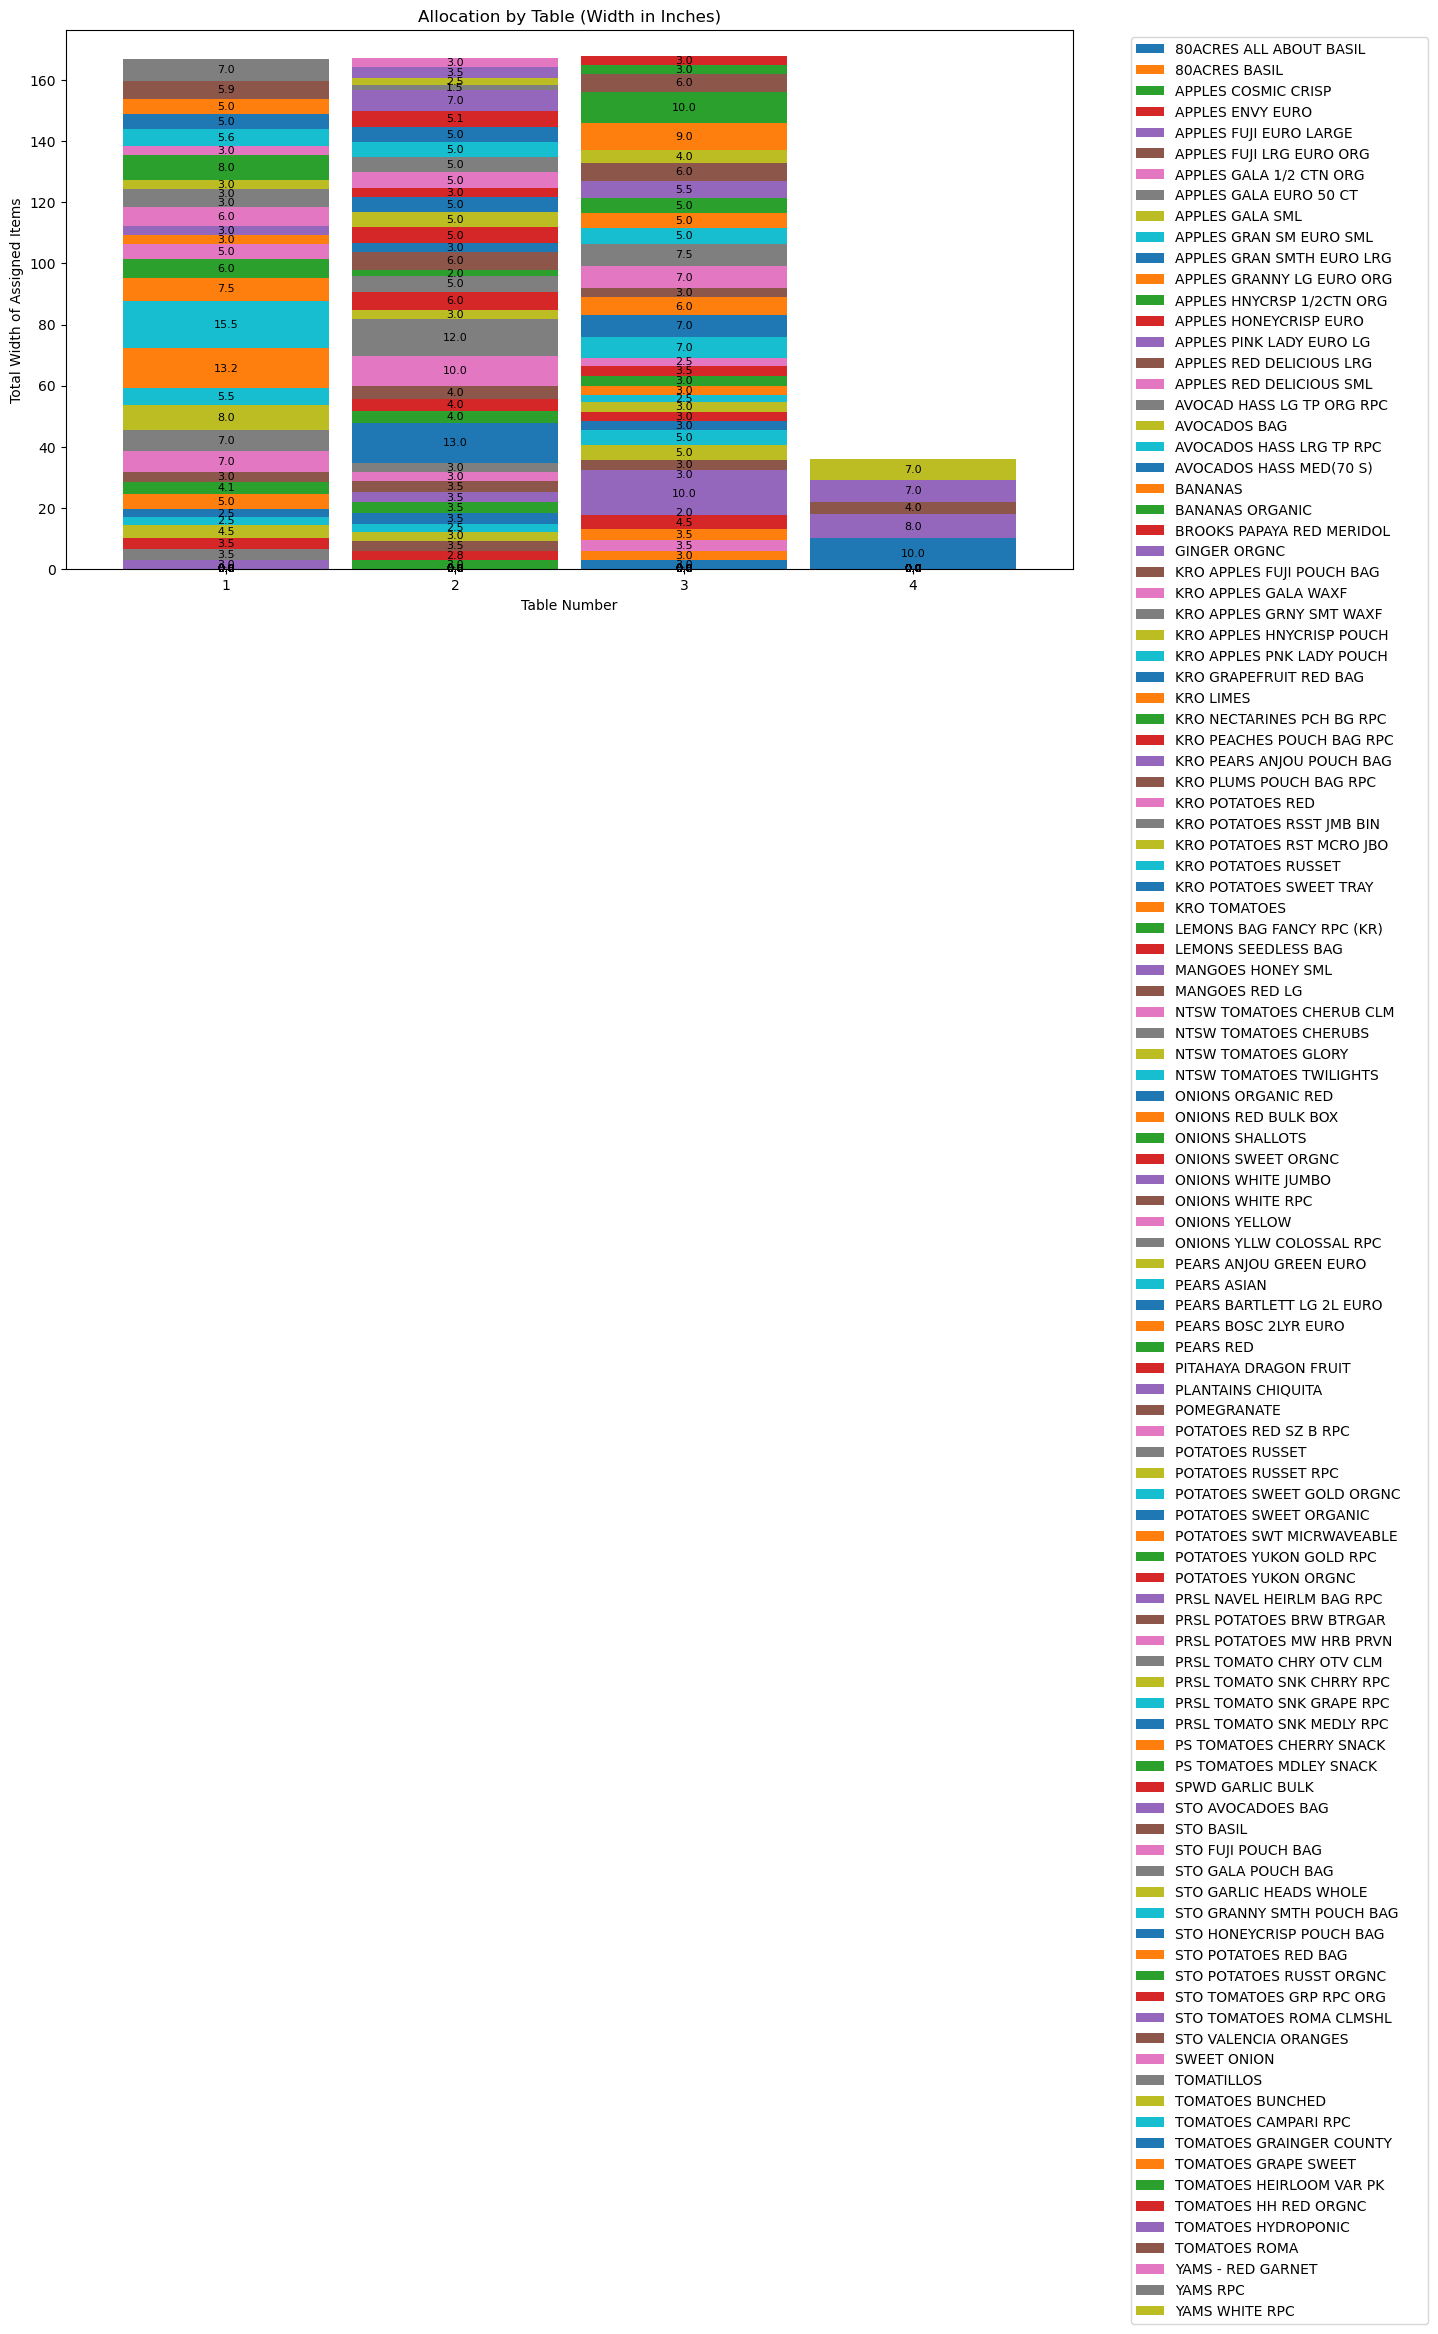

In [74]:

# Filter out unallocated items
df_assigned = df_merged[df_merged['AssignedTable'] != 'Unallocated'].copy()

# Group by Table and Item Description, summing total width used
table_item_df = df_assigned.groupby(['AssignedTable','UPC Desc'])['UPC Width (in)'].sum().unstack(fill_value=0)

# Plot the stacked bar chart
ax = table_item_df.plot(
    kind='bar', 
    stacked=True, 
    figsize=(13, 7), 
    width=0.9
)

# Add numeric labels on each stacked segment (the sum of widths)
for container in ax.containers:
    ax.bar_label(
        container, 
        label_type='center',   
        fmt='%.1f',            
        fontsize=8             
    )

ax.set_title('Allocation by Table (Width in Inches)')
ax.set_xlabel('Table Number')
ax.set_ylabel('Total Width of Assigned Items')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


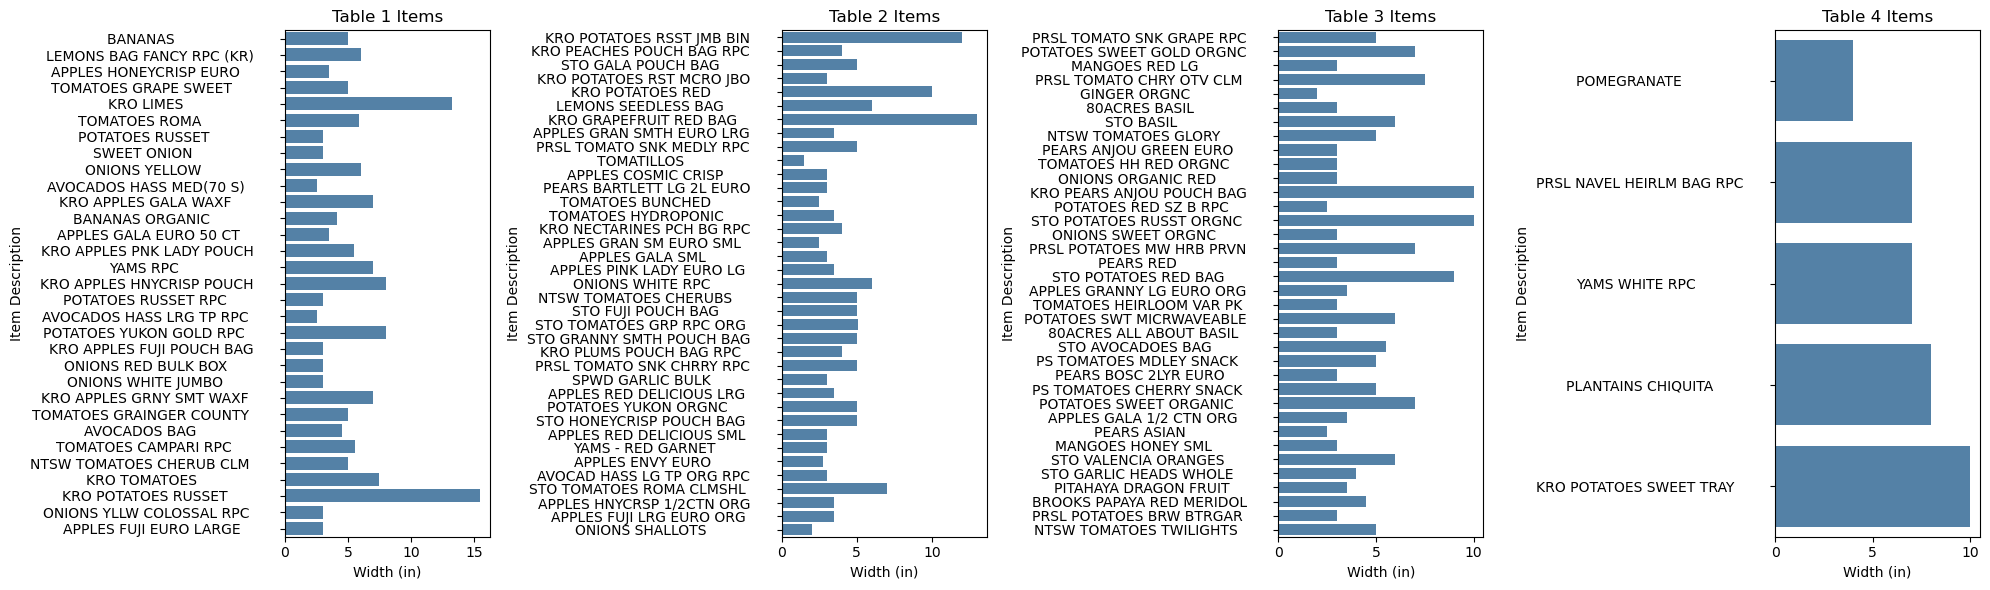

In [81]:
# Filter out unallocated items
df_assigned = df_merged[df_merged['AssignedTable'] != 'Unallocated'].copy()

# Get a unique list of the tables 
tables = sorted(df_assigned['AssignedTable'].unique())

# Create a figure with one subplot per table
fig, axes = plt.subplots(nrows=1, ncols=len(tables), figsize=(20, 6), sharex=False, sharey=False)

for i, table_num in enumerate(tables):
    ax = axes[i]
    
    # Subset the data for just this table
    df_table = df_assigned[df_assigned['AssignedTable'] == table_num]
    
    # Create a horizontal bar chart of item widths
    sns.barplot(
        data=df_table,
        x='UPC Width (in)',  
        y='UPC Desc',        
        ax=ax,
        color='steelblue'    
    )
    
    ax.set_title(f"Table {table_num} Items")
    ax.set_xlabel("Width (in)")
    ax.set_ylabel("Item Description")

plt.tight_layout()
plt.show()
